<a href="https://colab.research.google.com/github/fpr78/DO180-apps/blob/master/FasterR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
model_url = 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1'
print('loading model...')
hub_model = hub.load(model_url)
print('model loaded')

loading model...
model loaded


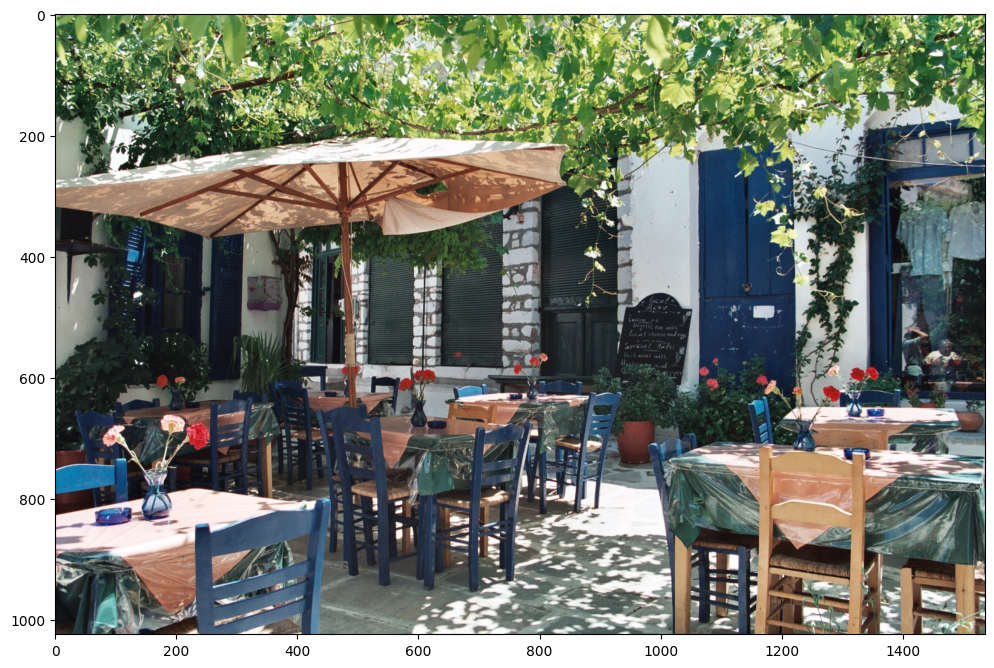

In [3]:
image_path = 'https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg'

response = urlopen(image_path)
image_data = response.read()
image_data = BytesIO(image_data)
image = Image.open(image_data)
(im_width, im_height) = image.size
image_np = np.array(image.getdata()).reshape((1, im_height, im_width, 3)).astype(np.uint8)

plt.figure(figsize=(12,16))
plt.imshow(image_np[0])
plt.show()

In [4]:
results = hub_model(image_np)

result = {key:value.numpy() for key, value in results.items()}

In [5]:
!git clone --depth 1 https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


In [6]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1697356 sha256=d64a1a02735d3850a2a94906d84d7b6b1c701c7178fac111c50ac266aefec3d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-5978r_tv/wheels/53/dd/70/2de274d6c443c69d367bd6a5606f95e5a6df61aacf1435ec0d
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [7]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

In [8]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
label_id_offset = 0
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections[0],
    result['detection_boxes'][0],
    (result['detection_classes'][0] + label_id_offset).astype(int),
    result['detection_scores'][0],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=200,
    min_score_thresh=.30,
    agnostic_mode=False)

plt.figure(figsize=(15,20))
plt.imshow(image_np_with_detections[0])
plt.show()



